In [2]:
import librosa 
import librosa.display
import scipy as sp
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#load audio file in the player
audio_path = "piano_c.wav"
ipd.Audio(audio_path)

In [10]:
#load audio file
signal, sr = librosa.load(audio_path)
print(sr)

22050


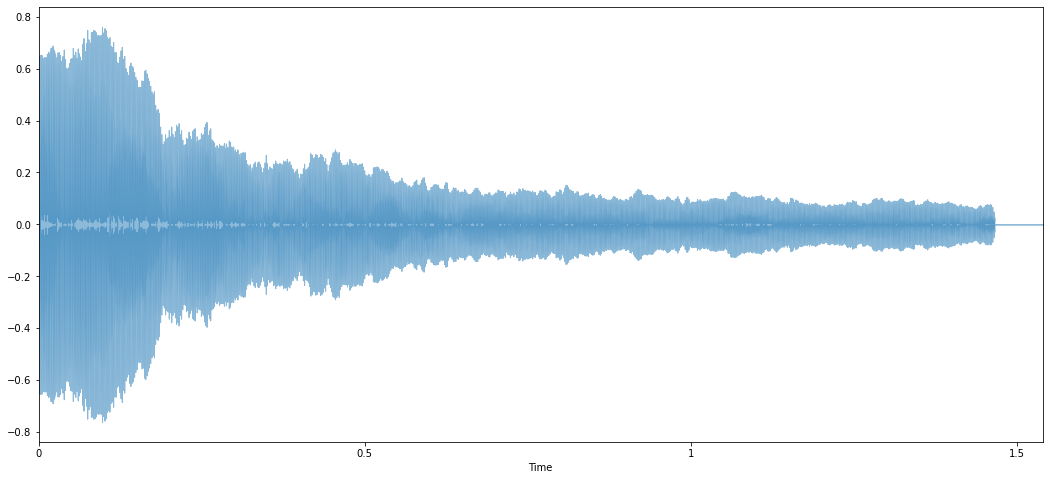

In [5]:
#plot waveform
plt.figure(figsize=(18,8))
librosa.display.waveplot(signal, sr=sr, alpha=0.5)
plt.show()

In [6]:
#derive spectrum using FT
ft = sp.fft.fft(signal)
magnitude = np.absolute(ft)
frequency = np.linspace(0, sr, len(magnitude))

<function matplotlib.pyplot.show(close=None, block=None)>

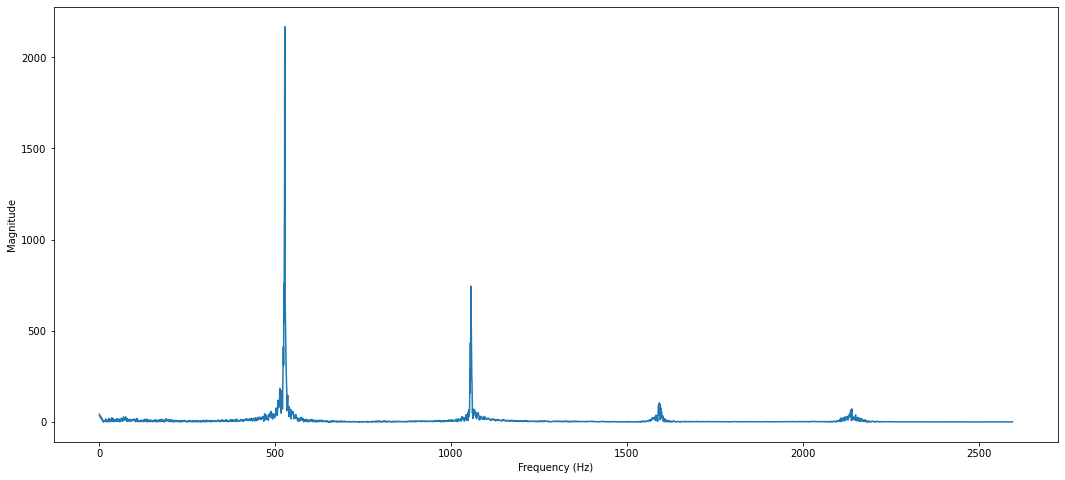

In [12]:
#plot spectrum
plt.figure(figsize=(18,8))
plt.plot(frequency[:4000], magnitude[:4000]) #magnitude spectrum
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show

In [8]:
len(signal)

33968

In [9]:
d=1/sr
d

4.5351473922902495e-05

In [14]:
#duration of 523 Hz
d_523 = 1/523
d_523

0.0019120458891013384

In [15]:
#duration of 400 samples
d_400_samples = 400*d
d_400_samples

0.018140589569160998

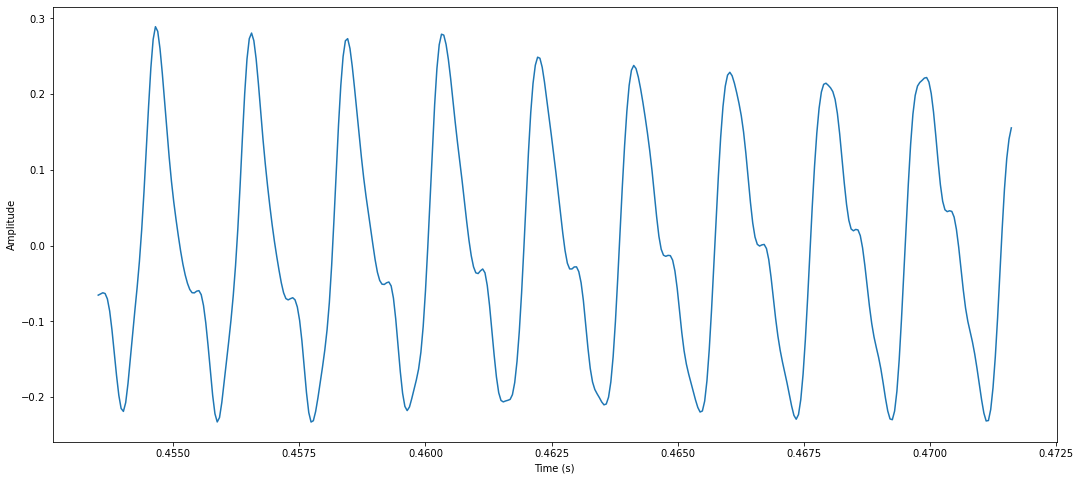

In [16]:
#zoom into the waveform
samples = range(len(signal))
t=librosa.samples_to_time(samples,sr=sr)

plt.figure(figsize=(18,8))
plt.plot(t[10000:10400], signal[10000:10400])
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

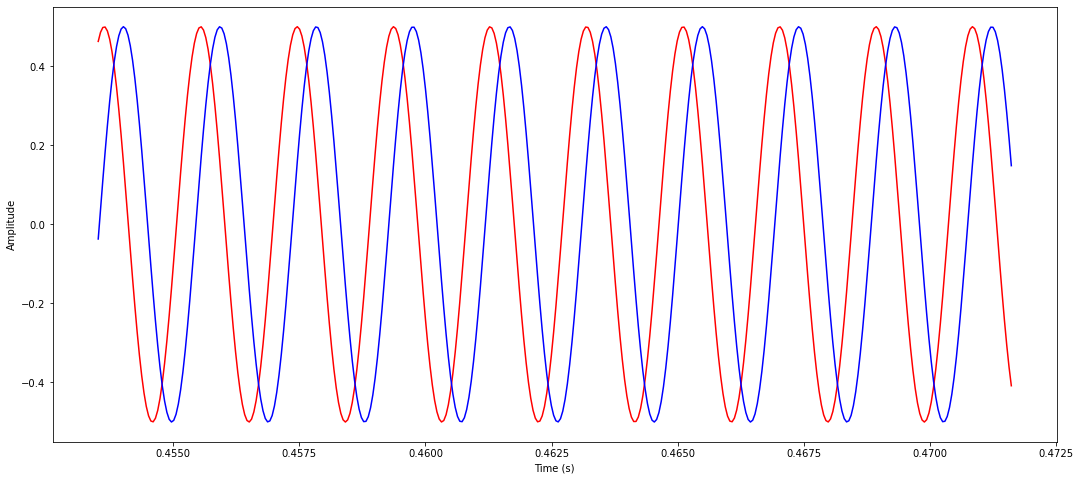

In [18]:
f = 523 #fundametan freq
phase = 0
phase2 = 0.2

sin = 0.5*np.sin(2*np.pi*(f * t - phase))
sin2 = 0.5*np.sin(2*np.pi*(f * t - phase2))

plt.figure(figsize=(18,8))
plt.plot(t[10000:10400],sin[10000:10400], color ='r')
plt.plot(t[10000:10400],sin2[10000:10400], color ='b')

plt.xlabel('Time (s)')
plt.ylabel("Amplitude")
plt.show()


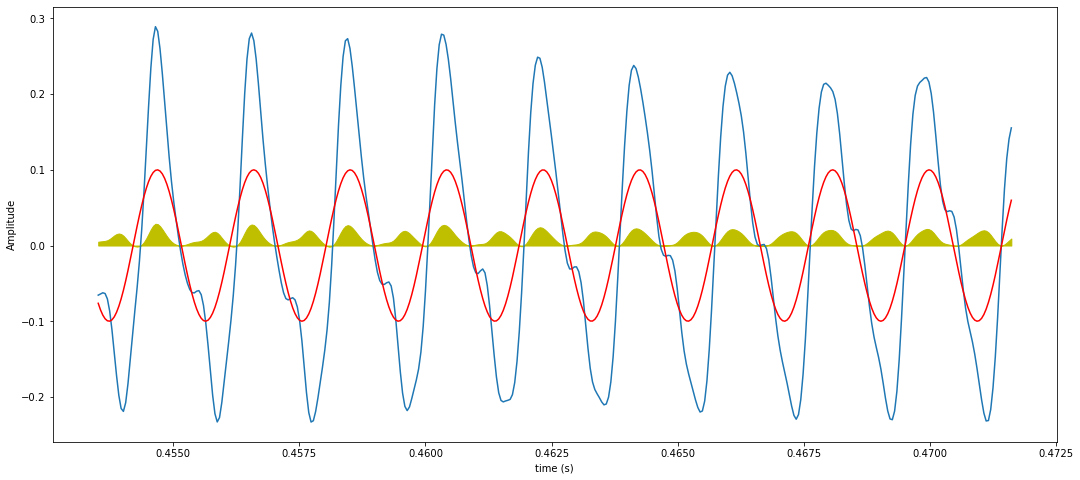

In [26]:
#compare signal and sinusoids

f = 523
phase = 0.55 #similar
#phase = 0.4 # not similar

sin = 0.1 * np.sin(2*np.pi * (f * t - phase))

plt.figure(figsize=(18,8))
plt.plot(t[10000:10400], signal[10000:10400])
plt.plot(t[10000:10400], sin[10000:10400], color = 'r')

plt.fill_between(t[10000:10400], sin[10000:10400]*signal[10000:10400], color='y')

plt.xlabel("time (s)")
plt.ylabel("Amplitude")
plt.show()
